In [1]:
import pandas as pd

In [2]:
x = pd.read_csv('cv.csv')

In [3]:
y = x['card_offered'].ravel()

In [4]:
train = x.drop(['score_affinity_spend','nbr_hist_elite_offer_extns','spend_retail','card_offered'], axis=1)

In [5]:
x_t = train.values

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

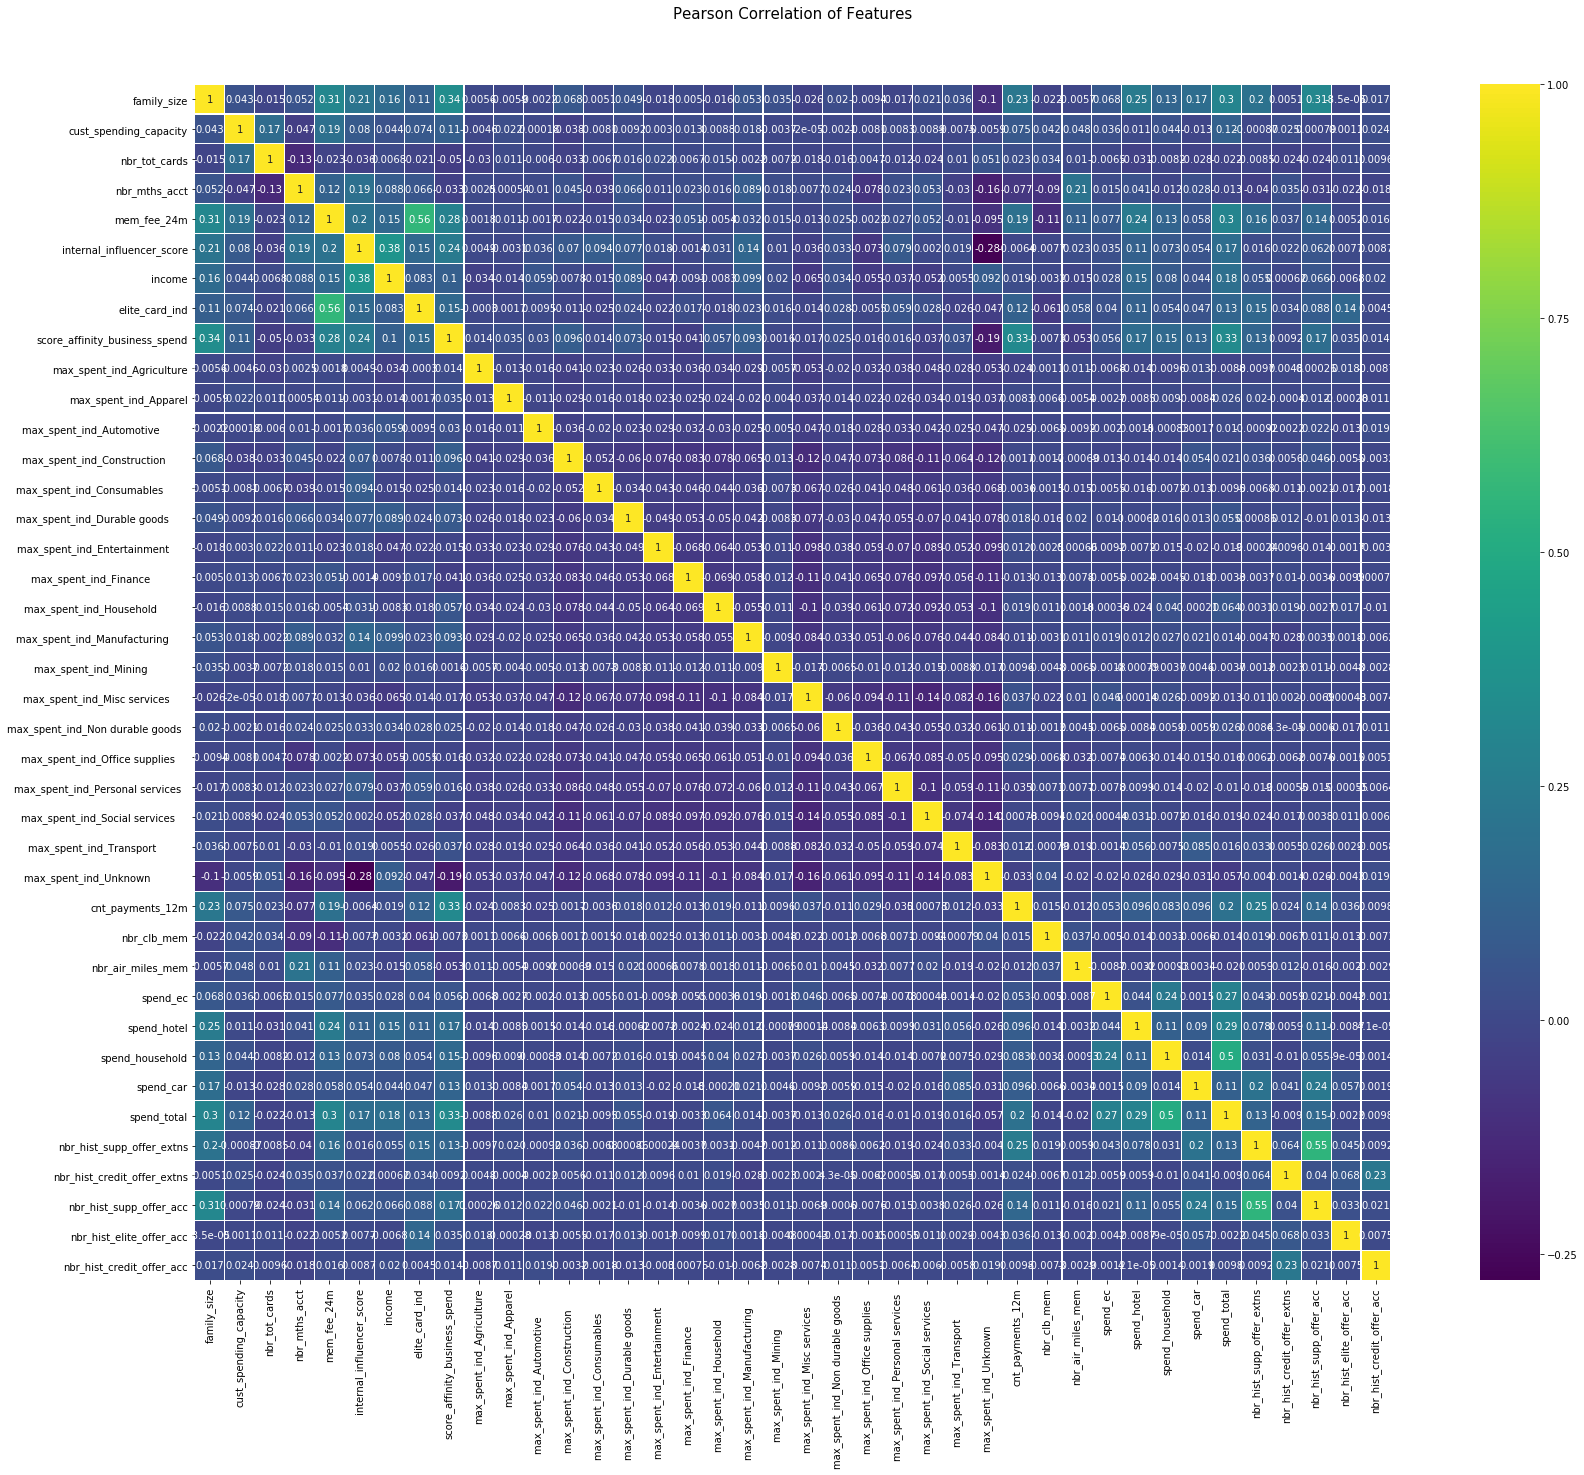

In [7]:
colormap = plt.cm.viridis
plt.figure(figsize=(32,22))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [8]:
from sklearn import model_selection
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np

In [12]:
clf1 = ExtraTreesClassifier(n_jobs=-1, n_estimators=1000,max_depth=8,min_samples_leaf=2,verbose=0)
clf2 = RandomForestClassifier(random_state=1,n_estimators=1000,n_jobs=-1,max_depth=6)
clf3 = AdaBoostClassifier(n_estimators=1500,learning_rate=0.5)
lr = GradientBoostingClassifier(learning_rate=0.1, loss='deviance', max_depth=5,n_estimators=2000,subsample=.5)
sclf = StackingClassifier(classifiers=[clf1, clf2, clf3],
                          meta_classifier=lr)

In [13]:
print('3-fold cross validation:\n')

for clf, label in zip([clf1, clf2, clf3, sclf], 
                      ['KNN', 
                       'Random Forest', 
                       'Gradient Boosting',
                       'StackingClassifier']):
    scores = model_selection.cross_val_score(clf, x_t, y, 
                                              cv=5, scoring='accuracy',n_jobs = -1)

3-fold cross validation:



In [15]:
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))

Accuracy: 0.54 (+/- 0.01) [StackingClassifier]


In [21]:
scores.view()

array([ 0.53373313,  0.54672664,  0.5375    ,  0.5415    ,  0.55405405])

In [25]:
model1 = sclf.fit(x_t,y)

In [26]:
t = pd.read_csv("cv1.csv")
tA = t.values
predictsA=model1.predict(tA)
i1 = pd.DataFrame({ 'card_offered': predictsA })

ValueError: Number of features of the model must match the input. Model n_features is 40 and input n_features is 43 

In [ ]:
i1.card_offered.value_counts()

In [ ]:
i1.to_csv("S1.csv", index=False)

In [ ]:
t1 = pd.read_csv("cv1.csv")
tB = t1.values
predictsB=model.predict(tB)
i2 = pd.DataFrame({ 'card_offered': predictsB })

In [ ]:
i2.to_csv("S2.csv", index=False)

In [ ]:
t11 = pd.read_csv("t1.csv")
t12 = pd.read_csv("t2.csv")

In [ ]:
testA = t11.values
testB = t12.values

In [ ]:
tr = pd.read_csv("trainfinal.csv")

In [ ]:
yr = tr['card_accepted'].ravel()

In [ ]:
af = tr.drop('card_accepted',axis=1)

In [ ]:
xr = af.values

In [ ]:
print('5 fold cross validation:\n')

for clfA, label in zip([clf1, clf2, clf3, sclf], 
                      ['KNN', 
                       'Random Forest', 
                       'Gradient Boosting',
                       'StackingClassifier']):
    scores = model_selection.cross_val_score(clfA, xr, yr, 
                                              cv=2, scoring='accuracy',n_jobs=-1)

In [ ]:
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))

In [ ]:
model = sclf.fit(xr, yr)

In [ ]:
predictsA1 = model.predict(testA)

In [ ]:
i11 = pd.DataFrame({ 'card_offered': predictsA1 })
i11.to_csv("Sub1.csv", index=False)

In [ ]:
i11.card_offered.value_counts()

In [ ]:
predictsB1=model.predict(testB)
i12 = pd.DataFrame({ 'card_offered': predictsB1 })
i12.to_csv("Sub2.csv", index=False)